In [1]:
# Decision Tree and KNN Classification of Principal components of EEG data set
# A total of first 40 Columns upto variance = 1 are selected 
# Contribution of all features are considered thus by the linear combination as given in components
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
eeg_pca = pd.read_csv("eeg_pca_all_Mod.csv")

In [45]:
eeg_pca.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'y'],
      dtype='object')

In [36]:
eeg_pca.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C32,C33,C34,C35,C36,C37,C38,C39,C40,y
count,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,...,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,11500.000000
mean,-6.434767e-12,4.000020e-12,3.478358e-12,8.260911e-12,7.739110e-12,5.999923e-12,2.521773e-12,-1.738750e-13,-4.086958e-12,3.652063e-12,...,-1.652171e-12,-4.173891e-12,1.173905e-11,-6.347833e-12,1.304373e-12,-1.043481e-12,-3.477762e-13,-5.826096e-12,-1.391326e-12,3.000000
std,3.159719e+00,3.054067e+00,2.972846e+00,2.931034e+00,2.800360e+00,2.716979e+00,2.686619e+00,2.634082e+00,2.553724e+00,2.462415e+00,...,1.523592e+00,1.494276e+00,1.426197e+00,1.394516e+00,1.307136e+00,1.196906e+00,1.096569e+00,1.060631e+00,9.868954e-01,1.414275
min,-3.472251e+01,-3.875663e+01,-3.736313e+01,-3.100859e+01,-2.833410e+01,-2.106016e+01,-2.496379e+01,-2.670985e+01,-2.910599e+01,-2.771948e+01,...,-1.691875e+01,-1.909063e+01,-2.000258e+01,-2.052583e+01,-1.756679e+01,-1.296933e+01,-1.792661e+01,-1.304413e+01,-1.382890e+01,1.000000
25%,-4.832010e-01,-4.861654e-01,-4.711165e-01,-4.506858e-01,-6.876488e-01,-1.195078e+00,-5.416575e-01,-1.119797e+00,-5.559593e-01,-7.692585e-01,...,-2.959082e-01,-3.257292e-01,-2.439990e-01,-2.225208e-01,-2.130407e-01,-2.056905e-01,-1.524571e-01,-1.669737e-01,-1.692109e-01,2.000000
50%,-3.895526e-02,2.332862e-03,-8.850477e-03,9.231791e-03,1.785829e-02,5.893835e-02,4.448018e-02,-4.589760e-02,2.133087e-02,3.154492e-03,...,-9.244097e-03,3.115520e-03,4.969701e-03,-7.965000e-06,5.860565e-03,1.184232e-02,2.377661e-02,3.130946e-03,-1.272622e-02,3.000000
75%,4.171722e-01,4.747425e-01,4.540274e-01,4.913377e-01,8.167425e-01,1.105186e+00,6.024013e-01,1.297714e+00,6.022882e-01,8.220335e-01,...,2.850805e-01,3.367179e-01,2.530717e-01,2.298445e-01,2.191603e-01,2.226151e-01,1.977843e-01,1.704705e-01,1.487752e-01,4.000000
max,3.929600e+01,3.081662e+01,3.040694e+01,2.916240e+01,3.022223e+01,2.430129e+01,2.941263e+01,2.152692e+01,2.779965e+01,1.851866e+01,...,1.835334e+01,1.307752e+01,2.047965e+01,1.507628e+01,2.191991e+01,2.045523e+01,1.277478e+01,1.234410e+01,1.361299e+01,5.000000


In [46]:
Class = list(eeg_pca.pop('y'))

In [47]:
samples = eeg_pca.values

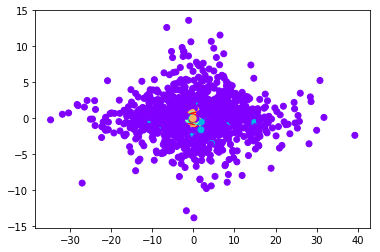

In [39]:
plt.scatter(samples[:,0],samples[:,39],c=Class,cmap='rainbow')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
samples_train, samples_test, Class_train, Class_test = train_test_split( samples, Class, test_size = 0.3, random_state = 100)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(samples_train, Class_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
predictions = dtree.predict(samples_test)

In [52]:
predictions

array([2, 1, 1, ..., 5, 5, 2], dtype=int64)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
cm = confusion_matrix(Class_test,predictions, labels = [1, 2, 3, 4, 5])

In [97]:
print(cm)

[[547  62  23  41  18]
 [ 45 302 194  40  86]
 [ 10 211 312  61 117]
 [ 39  60  46 378 171]
 [  2 101  99 158 327]]


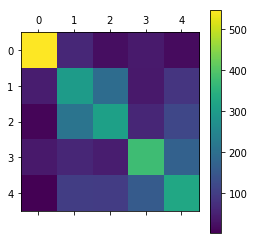

In [98]:
pl.matshow(cm)
pl.colorbar()
pl.show()

In [99]:
TP_1 = cm[0, 0] # Class 1 predicted as Class 1: Epileptic
TP_2 = cm[1, 1] # Class 2 predicted as Class 2: Probe at epileptic zone
TP_3 = cm[2, 2] # Class 3 predicted as Class 3: Probe at ealthy zone
TP_4 = cm[3, 3] # Class 4 predicted a Class 4: Eyes closed
TP_5 = cm[4, 4] # Class 5 predicted as Class 5: Eyes open

In [100]:
TP_1, TP_2, TP_3, TP_4, TP_5

(547, 302, 312, 378, 327)

In [101]:
TP = TP_1+TP_2+TP_3+TP_4+TP_5
TP

1866

In [113]:
len(samples_test) : # total instances = 11500

3450

In [102]:
Accuracy = TP/(len(samples_test))
Accuracy

0.54086956521739127

In [103]:
from __future__ import print_function

In [104]:
# Overall accuracy
from sklearn import metrics
print(metrics.accuracy_score(Class_test, predictions))
# overall prediction accuracy 54%

0.540869565217


In [107]:
FP = (cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4]) # for Class 1 epileptic
FP

144

In [108]:
FN = cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0] # for Class 1 epileptic
FN

96

In [111]:
# sensitivity for Class 1 prediction
TP/(TP+FN)

0.95107033639143734

In [ ]:
# prediction sensitivity for epileptic class : 95%

In [110]:
# selectivity towards Class 1 prediction
TP/(TP+FP)

0.92835820895522392

In [ ]:
# prediction selectivity for epileptic class : 92%

In [ ]:
# KNN Classification Investigation

In [116]:
# KNN on 10 folds cross validation on the dataset
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [120]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    print("The K is: ", k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, samples, Class, cv=10, scoring='accuracy')
    print(scores.mean())
    k_scores.append(scores.mean())
print(k_scores)

The K is:  1
0.571652173913
The K is:  2
0.524782608696
The K is:  3
0.515826086957
The K is:  4
0.513304347826
The K is:  5
0.502956521739
The K is:  6
0.493304347826
The K is:  7
0.485304347826
The K is:  8
0.478173913043
The K is:  9
0.476
The K is:  10
0.469043478261
The K is:  11
0.463391304348
The K is:  12
0.461130434783
The K is:  13
0.459652173913
The K is:  14
0.454260869565
The K is:  15
0.452608695652
The K is:  16
0.445913043478
The K is:  17
0.444260869565
The K is:  18
0.441739130435
The K is:  19
0.439913043478
The K is:  20
0.434695652174
The K is:  21
0.432869565217
The K is:  22
0.430782608696
The K is:  23
0.427304347826
The K is:  24
0.423391304348
The K is:  25
0.423217391304
The K is:  26
0.423739130435
The K is:  27
0.422086956522
The K is:  28
0.418173913043
The K is:  29
0.416434782609
The K is:  30
0.414086956522
[0.57165217391304346, 0.52478260869565219, 0.51582608695652177, 0.51330434782608703, 0.50295652173913041, 0.49330434782608706, 0.48530434782608695, 

Text(0,0.5,'Cross-Validated Accuracy')

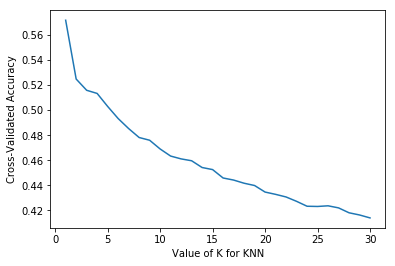

In [123]:
K_range = list(range(1,31))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')